# Import Libraris

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from tabulate import tabulate
from sklearn.ensemble import GradientBoostingClassifier
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, plot_confusion_matrix, precision_score, recall_score,r2_score, mean_squared_error, f1_score
from sklearn.model_selection import cross_val_score

**Load DataSet**

In [2]:
df=pd.read_csv("Tweets.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [4]:
df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


**Map labels into numbers**

In [5]:
df['sentiment']=df.sentiment.map({'neutral':1,'negative':0,'positive':2})
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,088c60f138,my boss is bullying me...,bullying me,0
3,9642c003ef,what interview! leave me alone,leave me alone,0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0


# Data Preprocessing

**Drop Useless Column**

In [6]:
df = df.drop(["textID", "text"], axis = 1)
df.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",1
1,Sooo SAD,0
2,bullying me,0
3,leave me alone,0
4,"Sons of ****,",0


**StopWords**

In [7]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

**StopWords Removal**

In [8]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['selected_text'] =df['selected_text'].apply(lambda text: remove_stopwords(text))
df.head()

,selected_text,sentiment
0,"I`d responded, I going",1
1,Sooo SAD,0
2,bullying,0
3,leave alone,0
4,"Sons ****,",0


**Count Comman Words**

In [9]:
from collections import Counter
cnt = Counter()
for text in df['selected_text'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('I', 4842),
 ('I`m', 940),
 ('good', 843),
 ('get', 741),
 ('like', 727),
 ('love', 723),
 ('day', 627),
 ('go', 605),
 ('got', 493),
 ('don`t', 489)]

**Remove FreqWords**

In [10]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df['selected_text'] =df['selected_text'].apply(lambda text: remove_freqwords(text))
df.head()

,selected_text,sentiment
0,"I`d responded, going",1
1,Sooo SAD,0
2,bullying,0
3,leave alone,0
4,"Sons ****,",0


**Removal Of RareWords**

In [11]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df['selected_text'] =df['selected_text'].apply(lambda text: remove_rarewords(text))
df.head()

,selected_text,sentiment
0,"I`d responded, going",1
1,Sooo SAD,0
2,bullying,0
3,leave alone,0
4,"Sons ****,",0


**Remove Urls and Html**

In [12]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
df['selected_text'] =df['selected_text'].apply(lambda text: remove_urls(text))
df
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
df['selected_text'] =df['selected_text'].apply(lambda text: remove_html(text))
df.head()


,selected_text,sentiment
0,"I`d responded, going",1
1,Sooo SAD,0
2,bullying,0
3,leave alone,0
4,"Sons ****,",0


**Remove Special Character**

In [13]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'  ## !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

    text=re.sub(pattern,'',text)
    return text
df['selected_text'] =df['selected_text'].apply(remove_special_characters)
df.head()

,selected_text,sentiment
0,I`d responded going,1
1,Sooo SAD,0
2,bullying,0
3,leave alone,0
4,Sons,0


**Stemming**

In [14]:
from nltk.stem.porter import PorterStemmer

# Drop the two columns 
#df.drop(["text_wo_stopfreq", "text_wo_stopfreqrare"], axis=1, inplace=True) 

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['selected_text'] =df['selected_text'].apply(lambda text: stem_words(text))
df.head()

,selected_text,sentiment
0,i`d respond go,1
1,sooo sad,0
2,bulli,0
3,leav alon,0
4,son,0


**Lemmantizing**

In [15]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['selected_text'] =df['selected_text'].apply(lambda text: lemmatize_words(text))
df.head()

,selected_text,sentiment
0,i`d respond go,1
1,sooo sad,0
2,bulli,0
3,leav alon,0
4,son,0


**Remove Puncutation Marks**

In [16]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

def preprocess(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)
df['selected_text'] =df['selected_text'].apply(lambda text: preprocess(text))
df.head()

,selected_text,sentiment
0,respond go,1
1,sooo sad,0
2,bulli,0
3,leav alon,0
4,son,0


**Slice Data Into Features And Labels**

In [17]:
x=df.iloc[:,0]
y=df.iloc[:,1]

**Split Data Into Traning And Testing Part**

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Apply CountVectorizer On Features**

In [19]:
ct=CountVectorizer()
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)
print(x_train.shape,x_test.shape)

(19236, 11968) (8245, 11968)


**Function For Evaluation Metrics Precision, Recall, F1 Etc**

In [20]:
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

# Machine Learning Models

**Support Vector Machine**

========== Support Vector Machine ==========

Accuracy on validation set: 0.7891

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.68      0.74      2348
           1       0.80      0.83      0.82      3340
           2       0.76      0.83      0.79      2557

    accuracy                           0.79      8245
   macro avg       0.79      0.78      0.78      8245
weighted avg       0.79      0.79      0.79      8245


Confusion Matrix : 
 [[1596  397  355]
 [ 230 2787  323]
 [ 124  310 2123]]


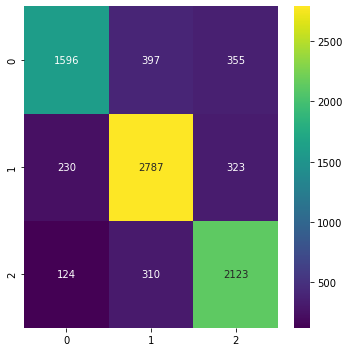

In [21]:
sv=SVC()
sv.fit(x_train,y_train)
y_pred_svc=sv.predict(x_test)
result_svc= modelEvaluation(y_pred_svc, y_test, 'Support Vector Machine')

**Decision Tree Classifier**

========== Decision Tree Classifier ==========

Accuracy on validation set: 0.6958

Classification report : 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      2348
           1       0.80      0.56      0.66      3340
           2       0.65      0.86      0.74      2557

    accuracy                           0.70      8245
   macro avg       0.70      0.71      0.69      8245
weighted avg       0.71      0.70      0.69      8245


Confusion Matrix : 
 [[1658  273  417]
 [ 679 1887  774]
 [ 157  208 2192]]


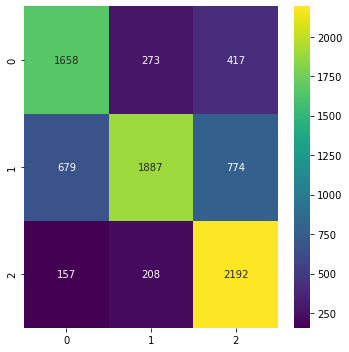

In [22]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
result_dt = modelEvaluation(y_pred_dt, y_test, 'Decision Tree Classifier')

**Gradient Boosting Classifier**

========== GradientBoosting ==========

Accuracy on validation set: 0.6395

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.45      0.58      2348
           1       0.54      0.88      0.67      3340
           2       0.83      0.51      0.63      2557

    accuracy                           0.64      8245
   macro avg       0.73      0.61      0.63      8245
weighted avg       0.71      0.64      0.63      8245


Confusion Matrix : 
 [[1045 1248   55]
 [ 193 2927  220]
 [  36 1220 1301]]


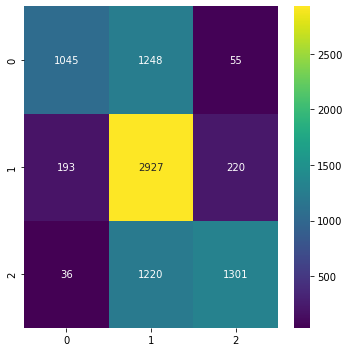

In [23]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
result_gb = modelEvaluation(y_pred_gb, y_test, 'GradientBoosting')

**Showing All Models Result and Graph**

+-----------+-----------------+----------+----------+
| Metrics   |   Decision tree |      SVC |      GBC |
|-----------+-----------------+----------+----------|
| accuracy  |        0.695816 | 0.789084 | 0.639539 |
| precision |        0.703205 | 0.791353 | 0.729433 |
| recall    |        0.709453 | 0.781476 | 0.610069 |
| f1-score  |        0.694688 | 0.783586 | 0.625591 |
+-----------+-----------------+----------+----------+


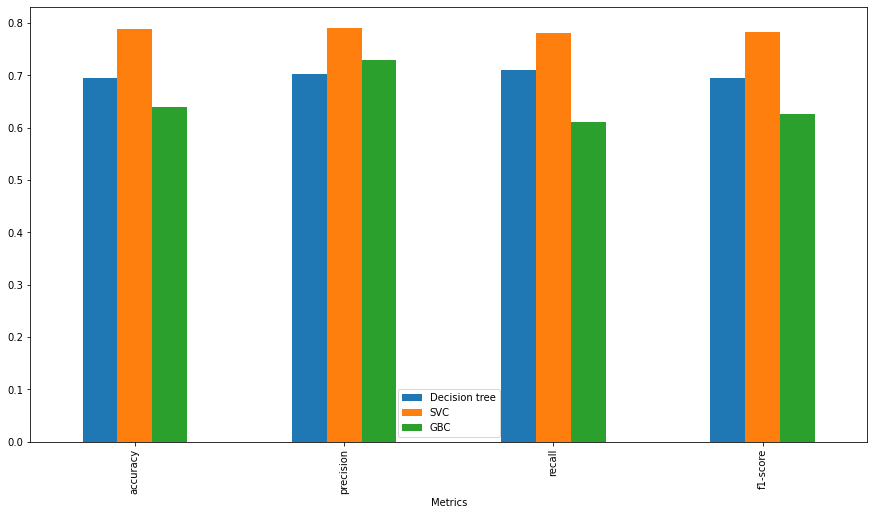

In [24]:
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' :result_dt,
    'SVC': result_svc,
    'GBC':result_gb
    
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df, headers = 'keys', tablefmt = 'psql'))
metrics_df.plot(kind='bar', figsize=(15,8))
plt.show()

**Accuracy Comparsion Graph**

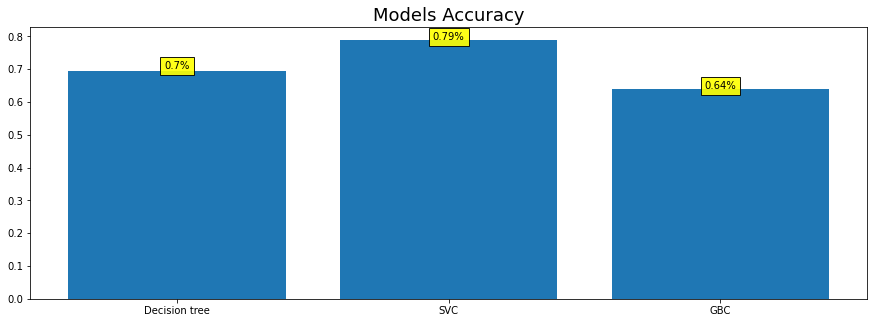

In [25]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(15,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()